In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from chapter_16 import *
%load_ext autoreload
%autoreload 2

digits = datasets.load_digits()
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [2]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [3]:
def show_grayscale_digit(digit_matrix):
    plt.imshow(digit_matrix, cmap=plt.cm.gray_r)


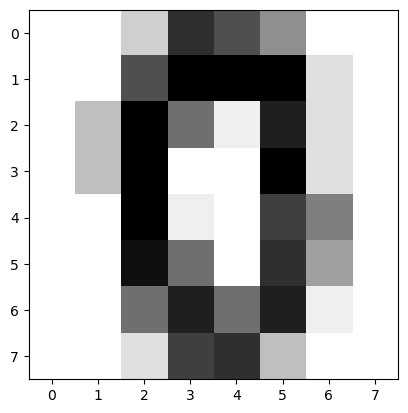

In [4]:
show_grayscale_digit(digits.images[20])

In [5]:
len(digits.images)

1797

In [6]:
digits_flattened = np.matrix.flatten(digits.images[0])
digits_flattened

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
def random_classifier(input_vector):
    return np.random.rand(10)

In [8]:
scaled_digits = digits_flattened / 15
pred = random_classifier(scaled_digits)
pred

array([0.34598657, 0.79984275, 0.06750541, 0.23763053, 0.14196424,
       0.41786394, 0.64055561, 0.08181899, 0.32854941, 0.63197881])

In [9]:
list(pred).index(max(pred))

1

In [10]:
def test_img_classifier(classifier, test_count=1000):
    correct = 0
    images = digits.images[:test_count]
    targets = digits.target[:test_count]
    imgs_results = zip(images, targets)
    for img,target in imgs_results:
        val = np.matrix.flatten(img)
        pred = classifier(val)
        answer = list(pred).index(max(pred))
        if answer == target:
            correct += 1

    return correct / len(images)


In [11]:
test_img_classifier(random_classifier)

0.095

Exercise 16.2-Mini Project: Find the average of all the images of 9’s in the data set in the same way we took averages of the images in chapter 6. Plot the resulting image. What does it look like?

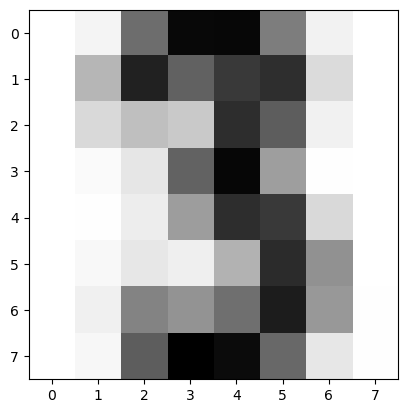

In [12]:
def average_img(num):
    all_images_with_targets = [img for img,target in zip(digits.images, digits.target) if target == num]
    return sum(all_images_with_targets) / len(all_images_with_targets)

show_grayscale_digit(average_img(3))

Exercise 16.3-Mini Project: Build a better classifier than the random one by finding the average image of each kind of digit in the test data set and comparing a target image with all of the averages. Specifically, return a vector of the dot products of the target image with each average digit image.

In [13]:
avgs = [np.matrix.flatten(average_img(i)) for i in range(0, 10)]
def compare_to_avg(v):
   return [np.dot(v ,avgs[i]) for i in range(10)]

In [14]:
test_img_classifier(compare_to_avg)

0.889

Exercise 16.9−Mini Project: Write a Python function sketch_mlp(*layer _sizes) that takes layer sizes of a neural network and outputs a diagram like the ones used throughout this section. Show all of the neurons with labels and draw their connections with straight lines. Calling sketch_mlp(3,4,3,2) should produce the example from the diagram we have used to represent the neural net throughout.

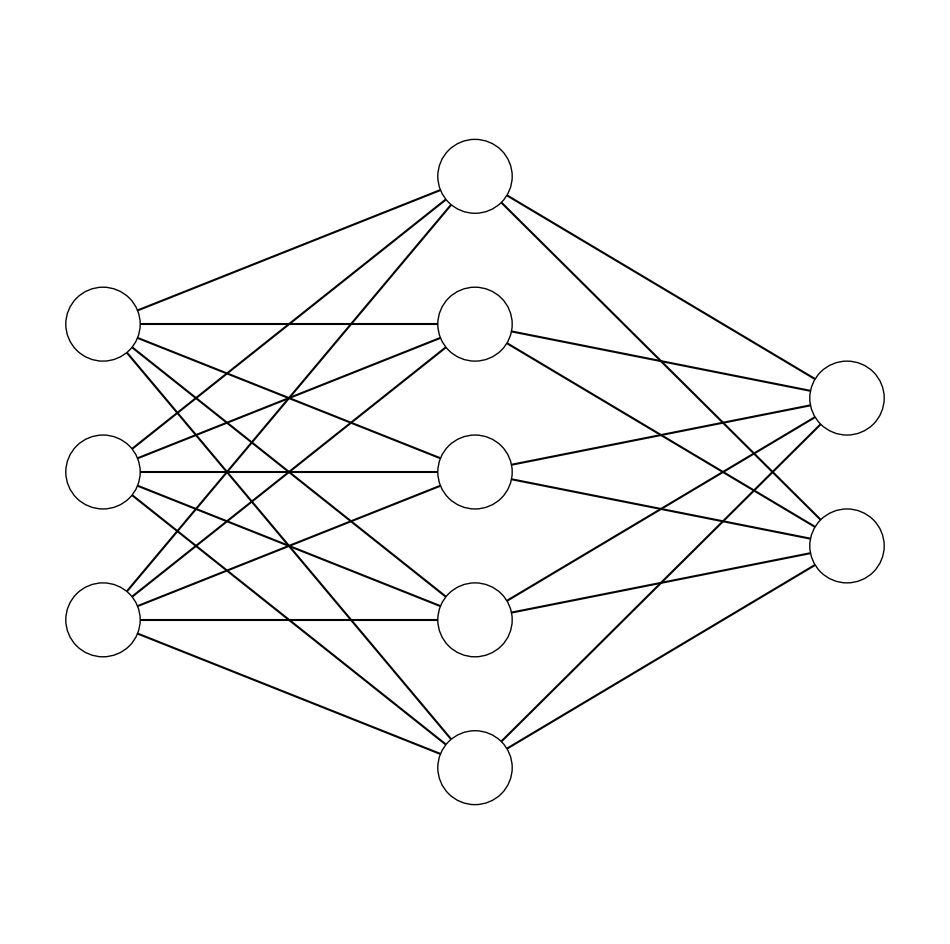

In [15]:
#chatgpt's version
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using Matplotlib.
    
    :param ax: Axes object for plotting
    :param left: x-coordinate of left edge of network
    :param right: x-coordinate of right edge of network
    :param bottom: y-coordinate of bottom edge of network
    :param top: y-coordinate of top edge of network
    :param layer_sizes: List containing the number of nodes in each layer
    '''
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    
    # Nodes
    for i, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for j in range(layer_size):
            circle = plt.Circle((i * h_spacing + left, layer_top - j * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            # Neuron labels
            ax.annotate(f'Neuron {j+1}', (i * h_spacing + left, layer_top - j * v_spacing), 
                        textcoords="offset points", xytext=(0,5), ha='center')

    # Edges
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for j in range(layer_size_a):
            for k in range(layer_size_b):
                line = plt.Line2D([i * h_spacing + left, (i + 1) * h_spacing + left],
                                  [layer_top_a - j * v_spacing, layer_top_b - k * v_spacing], c='k')
                ax.add_artist(line)

# Example usage
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of the neural network (e.g., 3 layers: input, hidden, output)
layer_sizes = [3, 5, 2]
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)

plt.show()


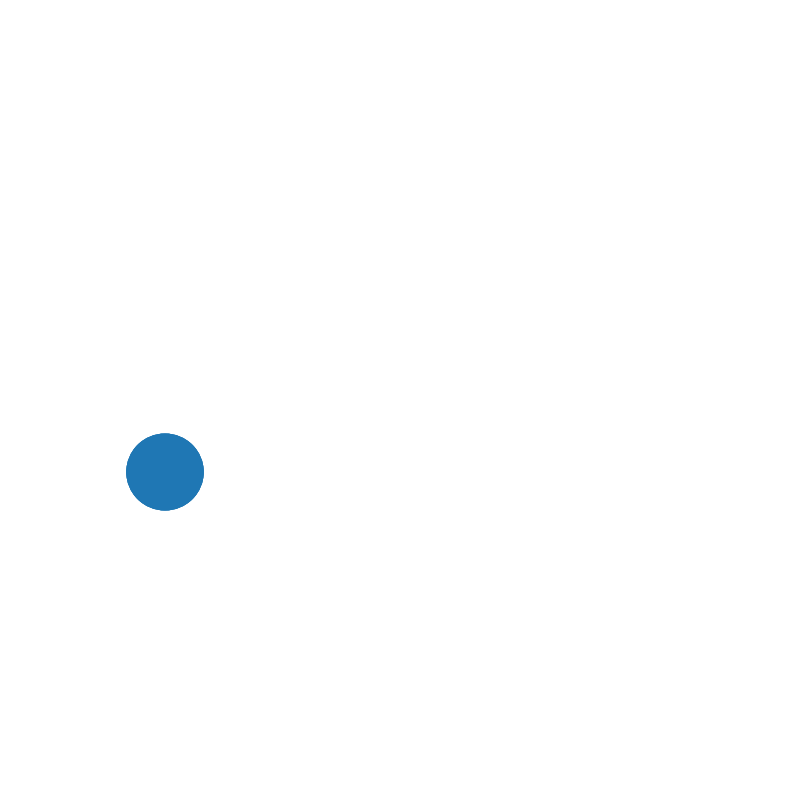

In [16]:
def sketch_mlp(*layer_sizes):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    ax.axis('off')
    for i,layer_size in enumerate(layer_sizes):
        circle = plt.Circle((0.2,0.4), 0.05)
        ax.add_artist(circle)
    
    plt.show()

sketch_mlp(2,4,2)

In [17]:
np.random.rand(2, 3)

array([[0.76145645, 0.07700678, 0.91805667],
       [0.74492724, 0.07656582, 0.49350376]])

In [18]:
layer_sizes = [3, 4, 3, 2]
list(zip(layer_sizes[:-1], layer_sizes[1:]))

[(3, 4), (4, 3), (3, 2)]

In [19]:
layer_sizes[1:],layer_sizes[:-1]

([4, 3, 2], [3, 4, 3])

In [20]:
nn = MLP([2,3])
nn.biases, nn.weights

([array([0.47271749, 0.208067  , 0.29351633])],
 [array([[0.35972652, 0.84984783],
         [0.82091263, 0.55242961],
         [0.57366308, 0.67183448]])])

In [21]:
nn = MLP([64,16,10])
nn.eval(scaled_digits[0])

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)